In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input, Dropout, LSTM
from tensorflow.keras.layers import Bidirectional,BatchNormalization
from tensorflow.keras.layers import PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.utils import resample
from tensorflow.keras.utils import plot_model

In [2]:
Empatica = pd.read_csv("BVP_ACC_EDA_TEMP.csv", low_memory=False)

In [3]:
Empatica

,BVP,status,ACC_x,ACC_y,ACC_z,EDA,TEMP
0,52.20,0,6,2,65,1.676214,35.55
1,49.83,0,6,2,65,1.676214,35.55
2,44.65,0,6,2,65,1.676214,35.55
3,35.26,0,6,2,65,1.676214,35.55
4,22.66,0,6,2,65,1.676214,35.55
...,...,...,...,...,...,...,...
287995,5.81,1,-51,-13,-37,0.171678,34.09
287996,6.03,1,-51,-13,-37,0.171678,34.09
287997,6.17,1,-51,-13,-37,0.171678,34.09
287998,6.30,1,-51,-13,-37,0.171678,34.09


In [5]:
to_drop = ['ACC_x', 'ACC_y', 'ACC_z']
Empatica.drop(to_drop, axis=1, inplace=True)

In [6]:
Empatica

,BVP,status,EDA,TEMP
0,52.20,0,1.676214,35.55
1,49.83,0,1.676214,35.55
2,44.65,0,1.676214,35.55
3,35.26,0,1.676214,35.55
4,22.66,0,1.676214,35.55
...,...,...,...,...
287995,5.81,1,0.171678,34.09
287996,6.03,1,0.171678,34.09
287997,6.17,1,0.171678,34.09
287998,6.30,1,0.171678,34.09


<AxesSubplot:>

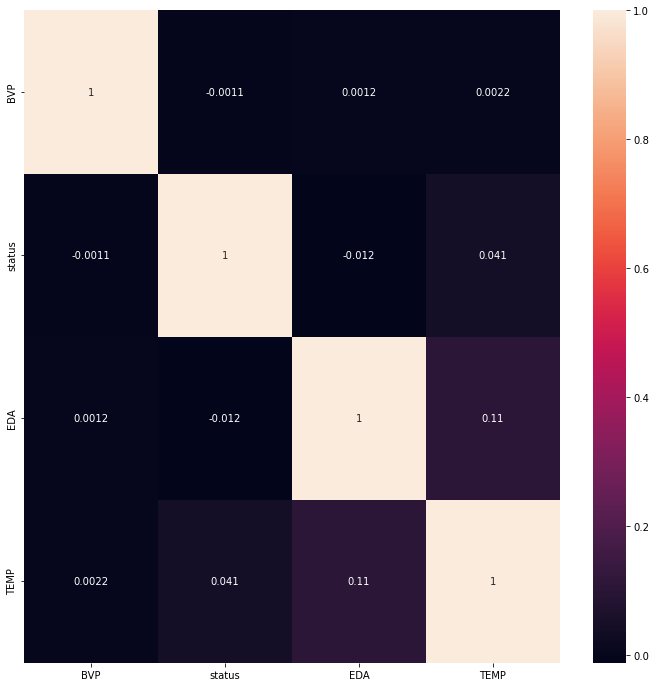

In [7]:
plt.figure(figsize = (12,12))
cor_matrix = Empatica.corr()
sns.heatmap(cor_matrix,annot=True)

In [9]:
y = Empatica.pop('status')
X = Empatica

In [10]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.15)

In [12]:
model2 = keras.Sequential()
model2.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')

In [13]:
call=callbacks.EarlyStopping(patience=10,min_delta=0.0001,restore_best_weights=True)

history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
1913/1913 [==============================] - 3s 1ms/step - loss: 0.5327 - accuracy: 0.7173 - val_loss: 0.4901 - val_accuracy: 0.7406
Epoch 2/20
1913/1913 [==============================] - 2s 962us/step - loss: 0.4660 - accuracy: 0.7586 - val_loss: 0.4459 - val_accuracy: 0.7734
Epoch 3/20
1913/1913 [==============================] - 2s 974us/step - loss: 0.4321 - accuracy: 0.7798 - val_loss: 0.4226 - val_accuracy: 0.7938
Epoch 4/20
1913/1913 [==============================] - 2s 1ms/step - loss: 0.3976 - accuracy: 0.8104 - val_loss: 0.3907 - val_accuracy: 0.8235
Epoch 5/20
1913/1913 [==============================] - 2s 989us/step - loss: 0.3629 - accuracy: 0.8335 - val_loss: 0.3697 - val_accuracy: 0.8236
Epoch 6/20
1913/1913 [==============================] - 2s 996us/step - loss: 0.3411 - accuracy: 0.8460 - val_loss: 0.3390 - val_accuracy: 0.8531
Epoch 7/20
1913/1913 [==============================] - 2s 1ms/step - loss: 0.3242 - accuracy: 0.8551 - val_loss: 0.3231 - val_a

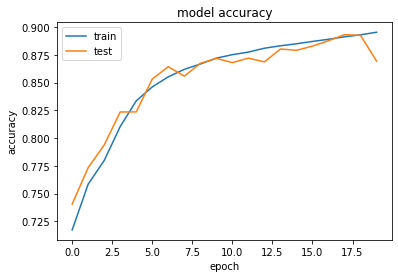

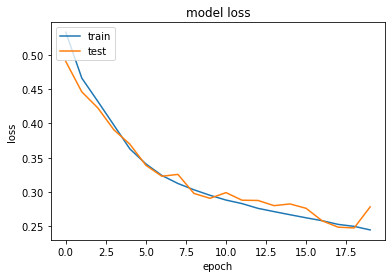

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("empatica_acc_dnn.png")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("empatica_loss_dnn.png")
plt.show()